# How fast should you drive at night?
The first question we're talking about in class involves the fastest speed it might be safe to drive at at night.  

Situation: you're driving at a speed $v0$ and you see something ahead of you that makes you panic stop.  The relevant coefficient of friction is $\mu_s=[0.4,0.7]$ and the object is $d=106m$ (350ft) ahead of you.

Human reaction time (visual) is about $t_v=0.25$ seconds.  While reacting, the car travels 

$x1=v0~t_v$.

Then, while braking, the car travels $x2$, where we've shown algebraically that $2~a~x2={v_2}^2-{v_1}^2$.  In this specific example we have, 

$2~\mu_s~g~x2=v0^2$.

So now, remember that the total travel distance is $x1+x2=106$ meters.  This gives the equation:

$v0~t_v+\frac{v0^2}{2~\mu_s~g}=106$ meters

So, what velocity makes this equation true?  In the context of the problem, what is the fastest velocity that will still allow us to stop in time?  

Mathematically, this is a root-finding problem.  One approach is to make a plot - when does the function on the left equal 106meters on the right?

In [1]:
# define parameters
g=9.8
mu_1=0.4
mu_2=0.7
tv=0.25
# make two lists - one of velocities, v0 and 
# another list of the left hand side of the equation
list_of_v0=[]
list_of_eq_lhs_1=[]
list_of_eq_lhs_2=[]
# iterate over possible v0's
for i in range(50):
    # generate v0 from 0 to 49
    v0 = 1+i 
    # for each v0, compute the other side of the equation
    lhs_mu_1 = v0*tv+v0*v0/(2*mu_1*g)
    lhs_mu_2 = v0*tv+v0*v0/(2*mu_2*g)
    # store the data in lists to plot
    list_of_v0.append(v0)
    list_of_eq_lhs_1.append(lhs_mu_1)
    list_of_eq_lhs_2.append(lhs_mu_2)

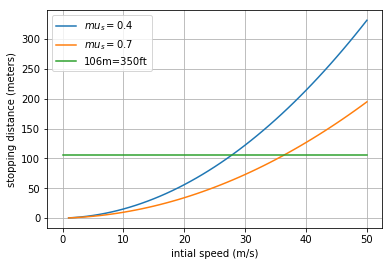

In [2]:
import matplotlib.pyplot as plt
# plot the two lhs data, note that this is stoppnig distance
plt.plot(list_of_v0,list_of_eq_lhs_1,label="$mu_s=0.4$")
plt.plot(list_of_v0,list_of_eq_lhs_2,label="$mu_s=0.7$")
# plot the problem's stopping distance
plt.plot([0,50],[106,106],label="106m=350ft")
plt.ylabel("stopping distance (meters)")
plt.xlabel("intial speed (m/s)")
plt.grid()
plt.legend()
plt.show()

With the graph, you can visually estimate where the lines intersect and solve the problem approximately.  If you need more precision than looking at graph provides, you can use a "root-finding" library.  This is the approach that most TI calculators take when you use them to solve an equation.

In [3]:
# root-finding takes an additional library
# using the function "fsolve" frim scipy.optimize
from scipy.optimize import fsolve

Now, the root-finding function takes an equation (as a function) as input.  It finds the input variable (v0) that makes the function zero.  This means we need to re-write the equation we're trying to solve as

$v0~t_v+\frac{v0^2}{2~\mu_s~g} - 106~meters = 0$


In [4]:
# then, we need to specify the equation we want to solve
# rewite so that it equals zero, eg
#   v0*tv+v0*v0/(2*mu_1*g) - distance =0
def func(v0,tv,mu,g,distance):
    return v0*tv + v0*v0/(2*mu*g) - distance

In [5]:
# then, specif parameters for the function,
tv,mu,g,distance = 0.25,0.4,9.8,106.

# and specify an initial guess for v0
guess_v0 = [30,]    

# and then run the solver
first_v=fsolve(func,guess_v0,args=(tv,mu,g,distance)) 
print(first_v)

[ 27.86441714]


So one intersection is 27.8 m/s.  Run the solver again for the other $\mu$

In [6]:
# then, specif parameters for the function,
tv,mu,g,distance = 0.25,0.7,9.8,106.

# and specify an initial guess for v0
guess_v0 = [30,]    

# and then run the solver
second_v=fsolve(func,guess_v0,args=(tv,mu,g,distance)) 
print(second_v)

[ 36.45909102]


Now, put these roots in a plot.

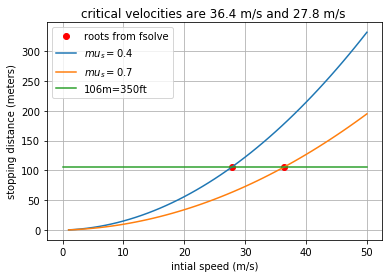

In [7]:
# plot the two roots
plt.plot([first_v[0],second_v[0]],[106,106],"ro",
         label="roots from fsolve")
plt.title("critical velocities are 36.4 m/s and 27.8 m/s ")
# everything following is from above
# plot the two lhs data, note that this is stoppnig distance
plt.plot(list_of_v0,list_of_eq_lhs_1,label="$mu_s=0.4$")
plt.plot(list_of_v0,list_of_eq_lhs_2,label="$mu_s=0.7$")
# plot the problem's stopping distance
plt.plot([0,50],[106,106],label="106m=350ft")
plt.ylabel("stopping distance (meters)")
plt.xlabel("intial speed (m/s)")
plt.grid()
plt.legend()
plt.show()

# Coasting down hwy 43

Also discussed in class is coasting down highway 43 from the I-90 interchange south of Winona.  Recall that the speed you achieve is limited by air resistance (drag).  The specific force balance could be modeled as:

$m~g~\sin[1.7 degrees] = \frac{1}{2}~C_D~A~\rho_{air}~v^2$

Below, I solve this equation for $v$ and estimate a value based on numbers for a modern VW Golf. 

In [40]:
import math
m=1360 # kg
g=9.8 # N/kg
A=2.3 # m^2, 71" x 51"
Cd=0.32
rho_air=1.2 # kg/m^3
sin_theta=150/5100 # from the geography of Winona

v_terminal = math.sqrt(m*g*sin_theta/(0.5*Cd*A*rho_air))

print(v_terminal,"m/s")
print(v_terminal*(6.2/10000)*(3600/1),"mph")

29.793978576556203 m/s
66.50016018287344 mph


Another version of this calculation is asking how much power it takes to drive a given speed.  $Power=\frac{Energy~Transfer}{Time}=\frac{F_{ext}~x}{t}=F_{ext}~v$. 

So, if air resistance is the only force we care about,  engine power to travel at a constant speed is, $P=\frac{1}{2}~C_D~A~\rho_{air}~v^3$.  For a VW Golf, this is, 

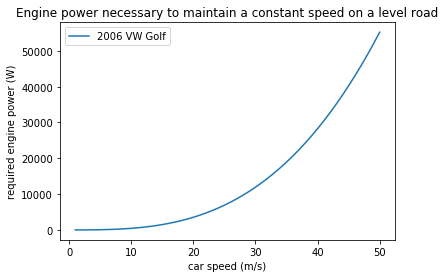

In [41]:
m=1360 # kg
g=9.8 # N/kg
A=2.3 # m^2, 71" x 51"
Cd=0.32
rho_air=1.2 # kg/m^3

v_mps_list=[]
v_mph_list=[]
p_W_list=[]
p_hp_list=[]
for i in range(50):
    v_mps=i+1
    v_mph=v_mps*2.23693629
    p_W=0.5*Cd*A*rho_air*v_mps**3
    p_hp=p_W*(1.0/746.0)
    v_mps_list.append(v_mps)
    v_mph_list.append(v_mph)
    p_hp_list.append(p_hp)
    p_W_list.append(p_W)
# Now that data is generated, plot
plt.plot(v_mps_list,p_W_list,label="2006 VW Golf")
plt.ylabel("required engine power (W)")
plt.xlabel("car speed (m/s)")
plt.title("Engine power necessary to maintain a constant speed on a level road")
plt.legend()
plt.show()

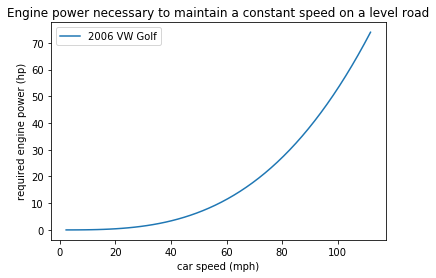

In [42]:
# here's the same plot, using "American" units of horsepower
# and miles per hour.
plt.plot(v_mph_list,p_hp_list,label="2006 VW Golf")
plt.ylabel("required engine power (hp)")
plt.xlabel("car speed (mph)")
plt.title("Engine power necessary to maintain a constant speed on a level road")
plt.legend()
plt.show()

# Gas mileage of a car based on air resistance losses

Of course, this graph leads to another interesting calculation.  What's the upper bound on gas mileage for a car travelling at a constant speed. I'll ignore frictional losses in the drivetrain, and use the following ideas:
1. One gallon of gas contains 121MJ of energy (note this is the EPA's [mpg-e](https://en.wikipedia.org/wiki/Miles_per_gallon_gasoline_equivalent) )
2. $Power=\frac{Energy~Transfer}{time}=\frac{Force \cdot distance}{time}$ so $Power=F\cdot v$.
3. As I've already used, if air resistance is the only relevant interaction, $P=\frac{1}{2}~C_D~A~\rho_{air}~v^3$
4. Automotive engine efficiency varies!  Standard gas engines that use the "Otto" cycle have a thermal efficiency of about $20-25\%$.  Some Hybrids have "Atkinson" cycle engines which have efficiency [as high as](http://newatlas.com/toyota-atkinson-engines-improved-thermal-fuel-efficiency/31615/) $38\%$.  Mathematically, the efficiency tells you how much of the fuel (gasoline) energy the engine is able to turn into usable energy transfer to push the car forward. $P_{out}=eff\cdot P_{in}$

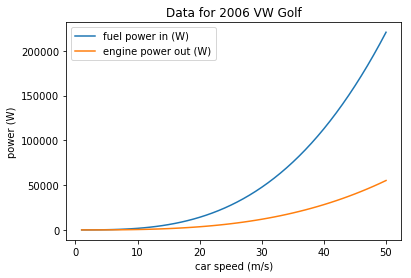

In [11]:
# scale the list of engine power by efficiency to 
# make a list of fuel power (the fuel/sec the engine requires)
eff=0.25
fuel_power_in = [p_out/eff for p_out in p_W_list]
                     
plt.plot(v_mps_list,fuel_power_in,label="fuel power in (W)")
plt.plot(v_mps_list,p_W_list,label="engine power out (W)")
plt.ylabel("power (W)")
plt.xlabel("car speed (m/s)")
plt.title("Data for 2006 VW Golf")
plt.legend()
plt.show()

Recall that 1 mpg-e assumes a gallon of gasoline has an energy of 121MJ, and that 1 Watt = 1 Joule/sec.

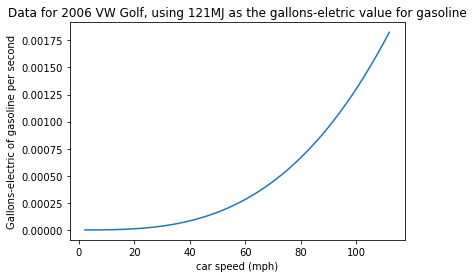

In [12]:
# rescale the fuel_power_in list from units of Watts to units
# of mpg-e, ie, gallons of gasoline per second
#conversion Watts = J/s = (J/s)*(1 gal-e/121e6 J)
gallons_eps = [x*(1.0/121.0e6) for x in fuel_power_in]

plt.plot(v_mph_list,gallons_eps,label="gasoline per second")
plt.ylabel("Gallons-electric of gasoline per second")
plt.xlabel("car speed (mph)")
plt.title("Data for 2006 VW Golf, using 121MJ as the gallons-eletric value for gasoline")
#plt.legend()
plt.show()

The vertical scale on the graph above, gallons/second, tells me how many gallons of gasoline the car requires each second at various speeds.  The inverse of this number, seconds/gallon, will tell me how many seconds a gallon of gas will last at a given speed.  

$t_G=seconds/gallon$

If I know how many seconds a gallon will last, I can multiply by the speed and figure out how many miles I'll be able to drive for a gallon of gas, at that speed.

$distance = t_G\cdot speed$ = miles per gallon of gas

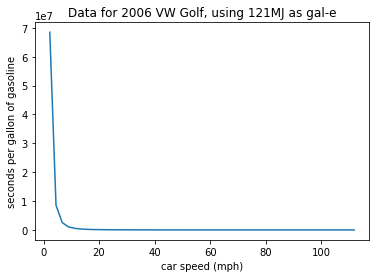

In [13]:
# the time a gallon-e of gas will last, in seconds 
tG_s = [1.0/x for x in gallons_eps]

plt.plot(v_mph_list,tG_s,label="seconds per gallon of gasoline")
plt.ylabel("seconds per gallon of gasoline")
plt.xlabel("car speed (mph)")
plt.title("Data for 2006 VW Golf, using 121MJ as gal-e")
#plt.legend()
plt.show()

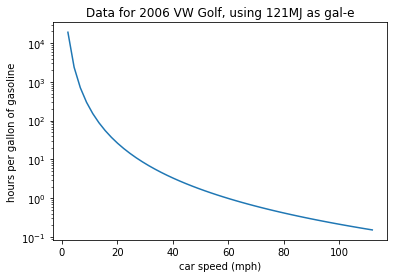

In [14]:
tG_hr = [(1.0/x)*(1.0/3600.0) for x in gallons_eps]

plt.semilogy(v_mph_list,tG_hr,label="seconds per gallon of gasoline")
plt.ylabel("hours per gallon of gasoline")
plt.xlabel("car speed (mph)")
plt.title("Data for 2006 VW Golf, using 121MJ as gal-e")
#plt.legend()
plt.show()

Now, the trick is just to multiply the "time for a gallon" list by the "miles in an hour" list.


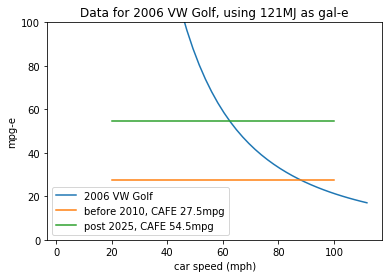

In [26]:
mpg=[]

# in this for loop, we're indexing over list index (subscript) i, rather 
# than iteracting over list value x[i]
for i in range(len(tG_hr)):
    
    miles_in_a_gallon=v_mph_list[i]*tG_hr[i]
    mpg.append(miles_in_a_gallon)

plt.plot(v_mph_list,mpg,label="2006 VW Golf")
plt.plot([20,100],[27.5,27.5],label="before 2010, CAFE 27.5mpg")
plt.plot([20,100],[54.5,54.5],label="post 2025, CAFE 54.5mpg")
plt.ylabel("mpg-e")
plt.xlabel("car speed (mph)")
plt.title("Data for 2006 VW Golf, using 121MJ as gal-e")
plt.ylim([0,100])
plt.legend()
plt.show()

The mpg-e numbers from above are the federal standards for auto manufacturers, the "Corporate Average Fuel Economy" or CAFE standards.  This number is the average fuel economy of all cars sold by a manufacturer.  See https://en.wikipedia.org/wiki/Corporate_Average_Fuel_Economy

The average speed during city driving is about 20mph, during the highway cycle, average speed is 48mph.  See https://www.fueleconomy.gov/feg/fe_test_schedules.shtml


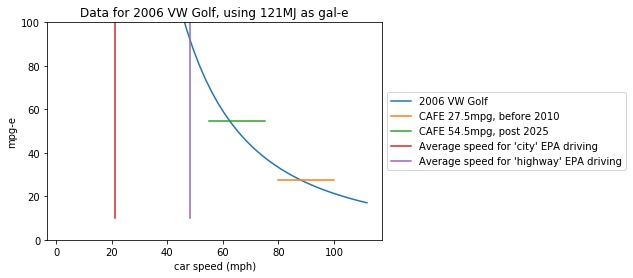

In [39]:
plt.plot(v_mph_list,mpg,label="2006 VW Golf")
plt.plot([80,100],[27.5,27.5],label="CAFE 27.5mpg, before 2010")
plt.plot([55,75],[54.5,54.5],label="CAFE 54.5mpg, post 2025")
plt.plot([21,21],[10,100],label="Average speed for 'city' EPA driving")
plt.plot([48,48],[10,100],label="Average speed for 'highway' EPA driving")
plt.ylabel("mpg-e")
plt.xlabel("car speed (mph)")
plt.title("Data for 2006 VW Golf, using 121MJ as gal-e")
plt.ylim([0,100])
#plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()